<a href="https://colab.research.google.com/github/zildj/CPE695-Applied-Machine-Learning/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[8.91905945e-01 1.78446893e+01 1.53215962e-51 3.63637138e+01]
[ 1.10829557 21.93934119  9.41584926 -8.87340388]


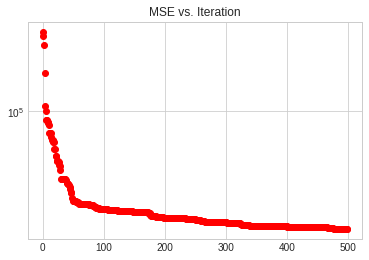

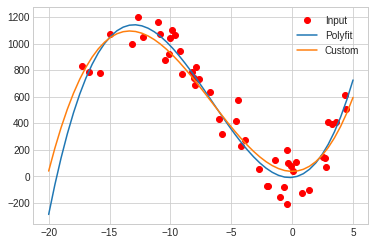

In [252]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import numpy as np

iterations = 500
number_of_elements = 3
number_of_arrays = 100
number_to_keep = 10
number_to_generate_per_array = int((number_of_arrays - number_to_keep) / number_to_keep)+1


noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.figure(0)
plt.title(f'MSE vs. Iteration')
plt.yscale('log')
x = x.ravel()
y = y.ravel()

trend = np.random.rand(number_of_arrays, number_of_elements+1)
mse = [None] * number_of_arrays
# trend[0] = np.polyfit(x,y,number_of_elements-1)
for i in range(iterations):
  # print(f'iteration {i}:')
  # computed MSE for each
  for j in range(len(trend)):
    mse[j] = ((y - np.polyval(trend[j],x))**2).mean(axis=0)
    # print(f'{j}: {mse[j]}')
  plt.figure(0)
  plt.plot(i, min(mse), 'ro')
  # print(f'Best MSE: {min(mse)}')
  # get top ten indexes
  idx = np.argsort(mse)[:number_to_keep]
  # print(f'Best indexes: {idx}')
  # put top ten in new array and expand them
  newTrend = trend.copy()
  for j in range(number_to_keep):
    for k in range(number_to_generate_per_array):
      index = j*number_to_generate_per_array+k
      newTrend[index] = trend[idx[j]]
      rand_index = np.random.randint(number_of_elements+1)
      # print(f'Adjusting index {rand_index} in array {index}')
      newTrend[index][rand_index] = newTrend[index][rand_index]*np.random.rand()*2
  # print(newTrend)
  trend = newTrend

custom = trend[np.argsort(mse)[:1]].ravel()
print(custom)
polyfit = np.polyfit(x,y,number_of_elements)
print(polyfit)

plt.figure(1)
plt.plot(x,y,'ro', label='Input')
t = np.linspace(-20,5)
plt.plot(t, np.polyval(polyfit, t), label='Polyfit')
plt.plot(t, np.polyval(custom, t), label='Custom')
plt.legend()